# Simulate a control system

![image](MassSpringDamperSystem.png)

In [5]:
import control as ct
import numpy as np

def mass_spring_damper_matrices(m, k, b, vel_output=False):
    ''' State space representation of a mass-spring-damper system
    ẋ = Ax + Bu
    y = Cx + Du
    
    x1 = position
    x2 = velocity
    u = force

    Args:   m: mass
            k: spring constant
            b: damping coefficient
            vel_output: True if both velocity and position are output, False if position is output

    Returns:    A: state matrix
                B: input matrix
                C: output matrix
                D: feedthrough matrix
    '''

    A = np.array([[0, 1], [-k/m, -b/m]])
    B = np.array([[0], [1/m]])
    if vel_output:
        C = np.array([[1, 0], [0, 1]])
    else:
        C = np.array([[1, 0], [0, 0]])
    D = np.array([[0], [0]])
    
    return A, B, C, D


def mass_spring_damper_tf(m, k, b):
    ''' Transfer function of a mass-spring-damper system
    H(s) = Y(s)/U(s) = 1/(ms^2 + bs + k)
    '''
    return ct.tf([1], [m, b, k])

# Define the system parameters
m = 1.0   # Mass
k = 2.0   # Spring constant
b = 0.5   # Damping coefficient

# Get the state space matrices
A, B, C, D = mass_spring_damper_matrices(m, k, b)

sys = ct.ss(A,B,C,D)
print(ct.ss2tf(sys))


print(ct.ss2tf(sys.sample(0.1)))


Input 1 to output 1:
       1
---------------
s^2 + 0.5 s + 2

Input 1 to output 2:
0
-
1


Input 1 to output 1:
 0.00491 z + 0.004828
----------------------
z^2 - 1.932 z + 0.9512

Input 1 to output 2:
0
-
1

dt = 0.1



# Several plots in control package

### **Plots**

In control theory, several plots are commonly used to analyze and understand the behavior and characteristics of control systems. Here are some important plots and their characteristics:

- Step Response:

The step response plot shows the output response of the system when subjected to a step input.
It provides information about the system's settling time, rise time, overshoot, and steady-state behavior.
The rise time represents the time taken for the response to rise from a certain percentage (e.g., 10%) to another percentage (e.g., 90%) of its final value.
The settling time is the time taken for the response to reach and stay within a certain percentage of the final value.
Overshoot indicates the maximum deviation of the response from its final value.
The steady-state behavior shows how the system settles and maintains a constant output.

- Bode Plot:

The Bode plot represents the frequency response of a system.
It consists of two subplots: magnitude plot and phase plot.
The magnitude plot shows the gain or attenuation of the system's output signal with respect to the input signal across different frequencies.
The phase plot shows the phase shift introduced by the system at different frequencies.
The Bode plot helps analyze the system's stability, gain margin, phase margin, bandwidth, and resonance characteristics.

- Nyquist Plot:

The Nyquist plot represents the frequency response of a system in the complex plane.
It shows the relationship between the system's input and output signals, considering both magnitude and phase.
The plot traces a contour as the frequency varies, and it can reveal the stability and robustness of the system.
The Nyquist plot helps analyze the system's stability, gain margin, phase margin, and sensitivity to variations.

- Root Locus Plot:

The root locus plot shows the locations of the system's poles as a parameter (usually the gain) is varied.
It helps analyze the stability and transient response of the system.
The plot reveals how the poles move in the complex plane as the parameter changes, indicating the effect on system behavior.
The root locus plot is useful for designing controllers and understanding the trade-off between stability and performance.

- Nichols plot:

The Nichols plot is a plot used for frequency response analysis in control systems. The Nichols plot displays the gain and phase margin of a system as a function of frequency. It is a log-magnitude versus phase plot, where the gain is typically represented in decibels and the phase in degrees. The Nichols plot helps in analyzing the stability and robustness of a control system by providing information about gain and phase margins. The gain margin represents the amount of gain that can be added to the system before it becomes unstable, while the phase margin indicates the amount of phase shift that can be introduced before the system becomes unstable. These margins are important measures of stability and indicate the system's robustness against uncertainties and disturbances.

These plots provide valuable insights into the behavior and characteristics of control systems, helping in system analysis, design, and performance evaluation.


### **Pole interpretation**
In control theory, poles and zeros play a crucial role in understanding the behavior and characteristics of a system. Here's how you can interpret poles and zeros:

Poles:

Poles represent the roots of the denominator polynomial of a transfer function. They indicate the locations in the complex plane where the system response becomes infinite or diverges.
The poles determine the stability of the system. If all poles have negative real parts, the system is stable. If any pole has a positive real part or lies on the imaginary axis, the system is unstable.
The distance of the poles from the origin (in the complex plane) determines the speed of the system response. Poles closer to the origin indicate faster response, while poles farther away indicate slower response.
Complex conjugate poles (occurring in pairs) represent oscillatory behavior in the system response.
Zeros:

Zeros represent the roots of the numerator polynomial of a transfer function. They indicate the locations in the complex plane where the system output becomes zero.
Zeros can affect the frequency response of the system. If a zero coincides with a pole, it can cancel out the corresponding pole and result in a flat response at that frequency.
Complex conjugate zeros (occurring in pairs) can introduce resonance or peaking in the system response.
Zeros far from the poles can contribute to the high-frequency behavior of the system.
Overall, the pole-zero locations and their relationship provide insights into the stability, transient response, frequency response, and overall behavior of the control system. Analyzing the pole-zero map helps in designing control strategies, adjusting system parameters, and predicting the system's response to different inputs.



Unstable system:  
9 s^2 + 113 s + 118
-------------------
   s^2 + 3 s + 2

Stable system:  
       1
---------------
s^2 + 0.5 s + 2



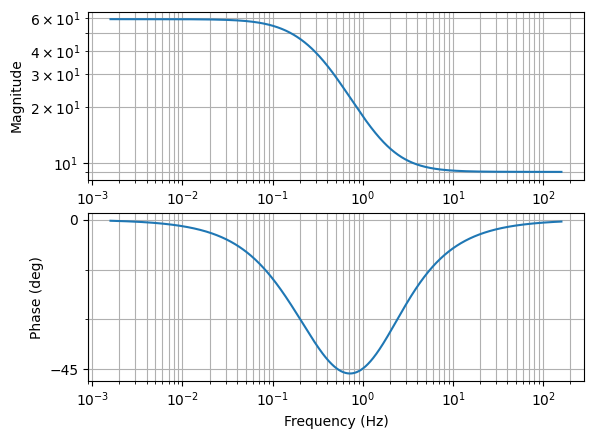

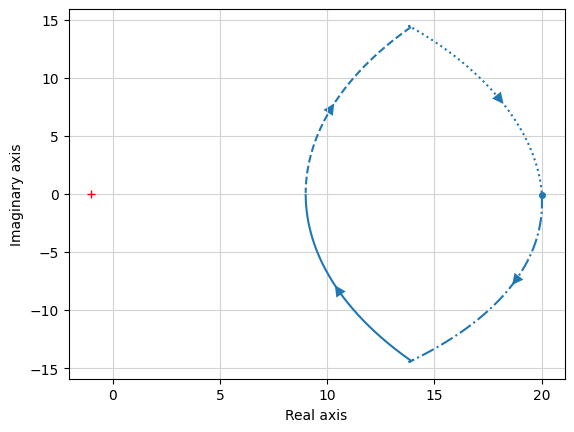

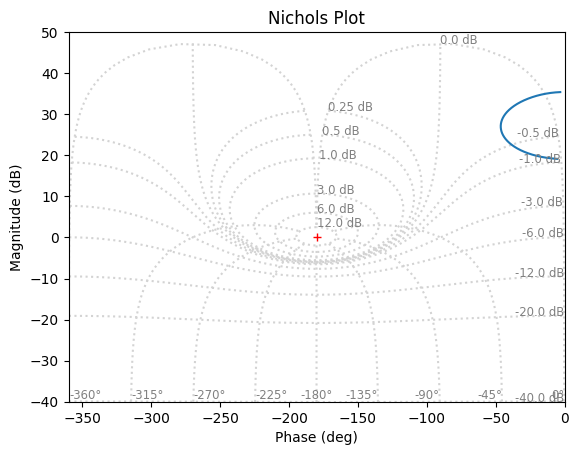

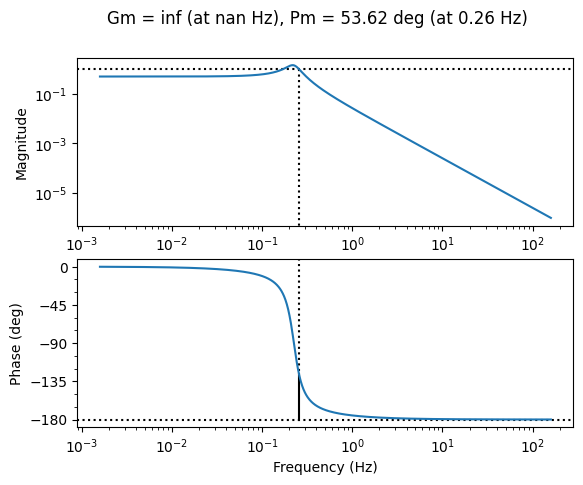

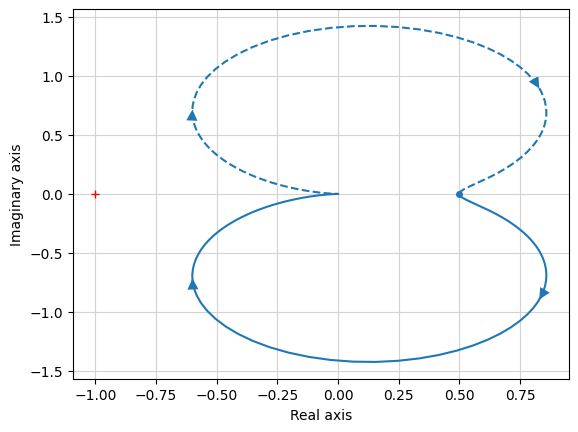

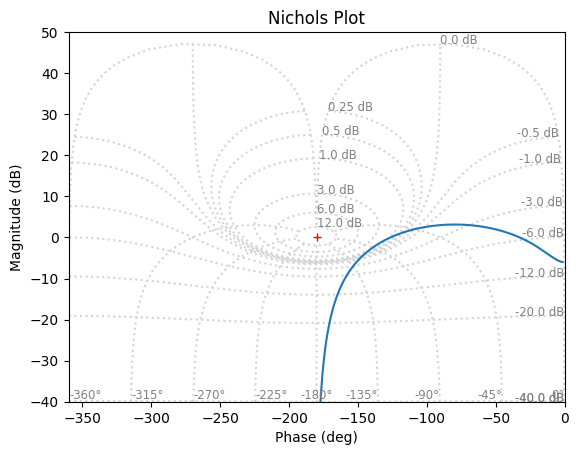

In [100]:
from matplotlib import pyplot as plt
# Set default params for control package
ct.config.set_defaults("freqplot", dB=False, Hz=True, deg=True, grid=True)

# Define linear time invariant system (LTI system)
A = [[1., -2], [3, -4]]
B = [[5.], [7]]
C = [[6., 8]]
D = [[9.]]
sys1 = ct.ss2tf(A, B, C, D)

print("Unstable system: ", sys1)

plt.figure()
mag, phase, omega = ct.bode(sys1,omega_limits=[0.01, 1000], margins=False,grid=True)
plt.figure()
count = ct.nyquist(sys1,omega_limits=[0.01, 1000])
plt.figure()
ct.nichols(sys1)

m = 1.0   # Mass
k = 2.0   # Spring constant
b = 0.5   # Damping coefficient
sys = mass_spring_damper_tf(m, k, b)

print("Stable system: ", sys)

plt.figure()
mag, phase, omega = ct.bode(sys,omega_limits=[0.01, 1000], margins=True,grid=True)
plt.figure()
count = ct.nyquist(sys,omega_limits=[0.01, 1000])
plt.figure()
ct.nichols(sys)

# responses of a open loop mass-spring-damper system

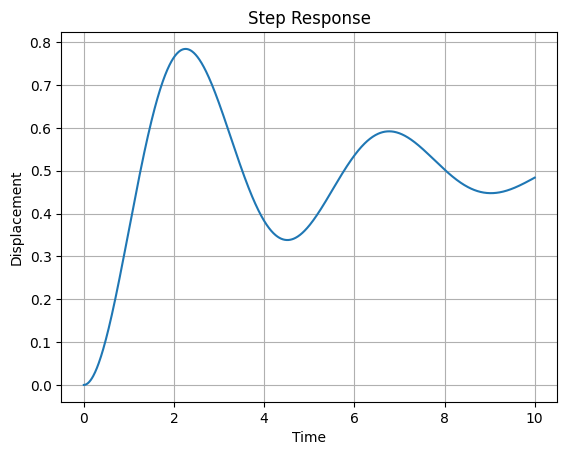

<Figure size 640x480 with 0 Axes>

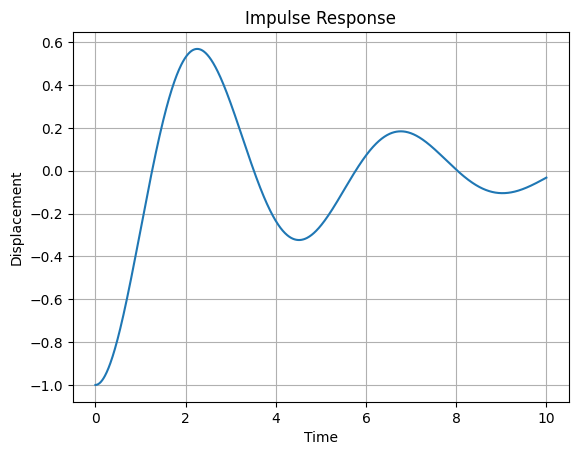

<Figure size 640x480 with 0 Axes>

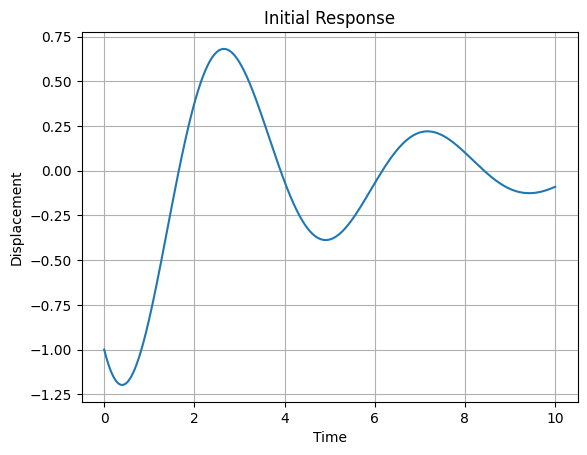

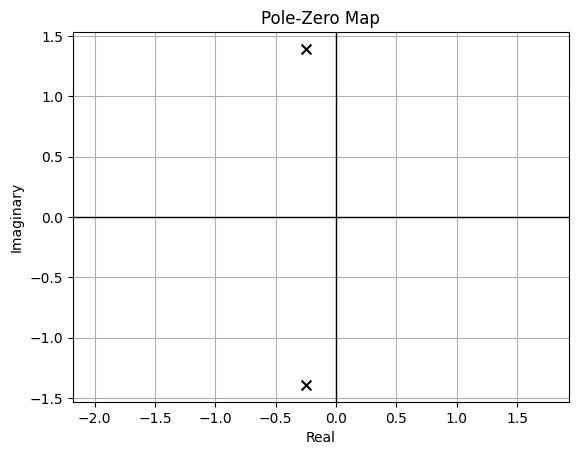

In [107]:
import control
import numpy as np
import matplotlib.pyplot as plt

# Define the system parameters
m = 1  # Mass
k = 2  # Spring constant
b = 0.5  # Damping coefficient

# Create the transfer function for the mass-spring system
num = [1]
den = [m, b, k]
sys = control.TransferFunction(num, den)
# Time vector
t = np.linspace(0, 10, 1000)

# Step response
t, y = control.step_response(sys,T=t)

# Plot the step response
plt.figure()
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Step Response')
plt.grid(True)

plt.figure()



# Time vector
t = np.linspace(0, 10, 1000)

# Step response
t, y = control.impulse_response(sys,T=t,X0=1)

# Plot the step response
plt.figure()
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Impulse Response')
plt.grid(True)

plt.figure()

# Time vector
t = np.linspace(0, 10, 1000)

# Step response
t, y = control.initial_response(sys,T=t,X0=1)

# Plot the step response
plt.figure()
plt.plot(t, y)
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.title('Initial Response')
plt.grid(True)

plt.figure()




# Compute the poles and zeros of the system
poles = control.pole(sys)
zeros = control.zero(sys)

# Plot the pole-zero map
control.pzmap(sys)

# Add labels and title
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.title('Pole-Zero Map')

# Show the plot
plt.grid()
plt.show()

# Design a PID for set point tracking the system

Standard form:
$$u(t)=K_p\left(e(t)+\frac{1}{T_i} \int_0^t e(\tau) d \tau+T_d \frac{d}{d t} e(t)\right)$$


Parallel form:
$$u(t)=K_p e(t)+K_i \int_0^t e(\tau) d \tau+K_d \frac{d}{d t} e(t)$$

There are two forms of PID controller: Kp, Ki, Kd; Kp, Ti, Td

$T_{i}$ is the integral time
$T_{d}$ is the derivative time

In this standard form, the parameters have a clear physical meaning. In particular, the inner summation produces a new single error value which is compensated for future and past errors. The proportional error term is the current error. The derivative components term attempts to predict the error value at $T_{d}$ seconds (or samples) in the future, assuming that the loop control remains unchanged. The integral component adjusts the error value to compensate for the sum of all past errors, with the intention of completely eliminating them in $T_{i}$ seconds (or samples). The resulting compensated single error value is then scaled by the single gain $K_{p}$ to compute the control variable.

# How to autotune
https://www.mathworks.com/videos/understanding-pid-control-part-6-manual-and-automatic-tuning-methods-1533639047484.html

![image](PIDTunner.PNG)


# Effect of Ki Kp Kd
https://ctms.engin.umich.edu/CTMS/index.php?example=Introduction&section=ControlPID
![image](EffectOfKiKpKd.PNG)



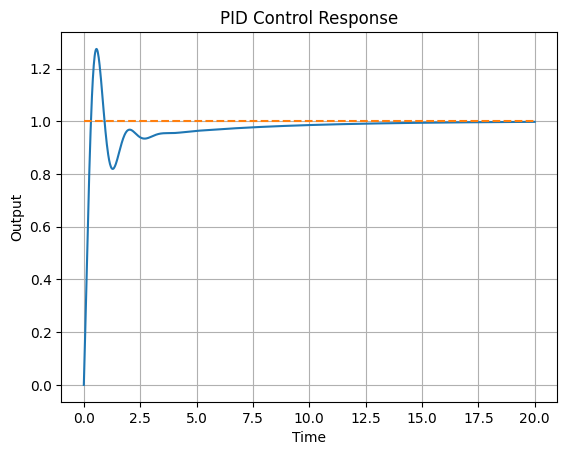

In [110]:
import control
import matplotlib.pyplot as plt
import numpy as np

# System parameters
m = 1.0
b = 0.5
k = 2.0

# Transfer function of the plant
num = [1]
den = [m, b, k]
plant = control.TransferFunction(num, den)

# PID controller gains
Kp = 20
Ki = 4
Kd = 3

# Create the PID controller transfer function
controller = control.TransferFunction([Kd, Kp, Ki], [1, 0])

# Closed-loop system
closed_loop = control.feedback(controller * plant)

# Time vector
t = np.linspace(0, 20, 1000)

# Generate a step reference input
ref = np.ones_like(t)

# Simulate the response of the closed-loop system
t, y = control.forced_response(closed_loop, T=t, U=ref)

# Plot the response
plt.plot(t, y)
plt.plot(t, ref, '--', label='GT')
plt.title('PID Control Response')
plt.xlabel('Time')
plt.ylabel('Output')
plt.grid(True)
plt.show()

# Auto PID controller with pole placement

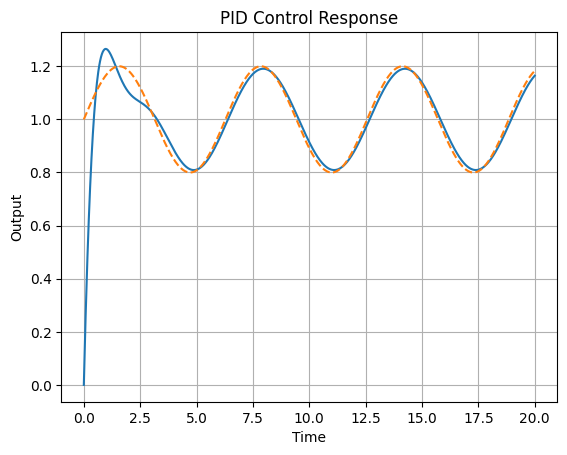

In [109]:
import control
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
# System parameters
m = 1.0
b = 0.5
k = 2.0

# Transfer function of the plant
num = [1]
den = [m, b, k]
plant = control.TransferFunction(num, den)

# PID controller gains using Pole placement method
desired_poles = [-1+2j, -1 -2j,-3]  # Adjust based on system requirements

# Calculate PID gains using pole placement
# Define the cost function to minimize
def cost_function(x):
    Kp, Ki, Kd = x
    controller_tf = control.TransferFunction([Kd, Kp, Ki], [1, 0])
    closed_loop_tf = control.feedback(controller_tf * plant)
    poles = control.poles(closed_loop_tf)
    return np.sum(np.abs(poles - desired_poles))

# Perform optimization to find the optimal PID gains
result = minimize(cost_function, x0=[1, 1, 1], method='Nelder-Mead')

# Extract the optimal PID gains
Kp, Ki, Kd = result.x

# Create the PID controller transfer function
controller = control.TransferFunction([Kd, Kp, Ki], [1, 0])

# Closed-loop system
closed_loop = control.feedback(controller * plant)

# Time vector
t = np.linspace(0, 20, 1000)

# Generate a step reference input
ref = np.ones_like(t) +0.2*np.sin(t)

# Simulate the response of the closed-loop system
t, y = control.forced_response(closed_loop, T=t, U=ref)

# Plot the response
plt.plot(t, y)
plt.plot(t, ref, '--', label='GT')
plt.title('PID Control Response')
plt.xlabel('Time')
plt.ylabel('Output')
plt.grid(True)
plt.show()

# Find Kp, Ki, Kd using time domain analysis

In time-domain analysis, the criteria used to determine the values of Kp, Ki, and Kd for a PID controller depend on the desired performance specifications of the control system. Some commonly used time-domain criteria are:

Settling Time: The settling time is the time it takes for the system's response to reach and stay within a specified percentage of the desired setpoint. The controller gains can be adjusted to achieve the desired settling time.

Rise Time: The rise time is the time it takes for the system's response to rise from a specified lower percentage to a specified higher percentage of the desired setpoint. The controller gains can be tuned to achieve the desired rise time.

Overshoot: The overshoot is the maximum percentage by which the system's response exceeds the desired setpoint before reaching stability. The controller gains can be adjusted to reduce or eliminate overshoot.

Settling Overshoot: Similar to overshoot, settling overshoot is the maximum percentage by which the system's response exceeds the desired setpoint during the settling time. The controller gains can be tuned to minimize settling overshoot.

Steady-State Error: Steady-state error is the difference between the desired setpoint and the actual output when the system reaches a stable condition. The integral gain (Ki) can be adjusted to reduce steady-state error.

To find the values of Kp, Ki, and Kd based on these criteria, an iterative tuning process is often used. The controller gains are adjusted, and the system's response is simulated or tested until the desired performance specifications are met. Different methods, such as trial and error, Ziegler-Nichols method, or optimization algorithms, can be used for the tuning process.

It's important to note that the selection of the appropriate time-domain criteria and the tuning process can vary depending on the specific control system and its requirements. It may also involve trade-offs between different performance metrics.

1.1653364802314607 0.7644093972234045 1.0632338006366882


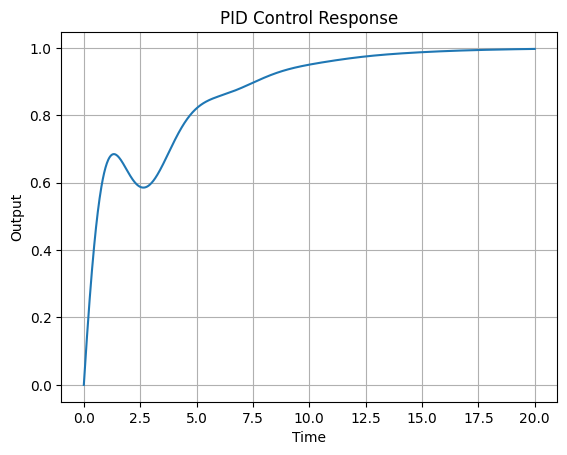

In [50]:



import control
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
# System parameters
m = 1.0
b = 0.5
k = 2.0

# Transfer function of the plant
num = [1]
den = [m, b, k]
plant = control.TransferFunction(num, den)


# Define the cost function to minimize
# Define the desired specifications
settling_time = 2.0  # Desired settling time in seconds
rise_time = 0.5  # Desired rise time in seconds
overshoot = 0.2  # Desired overshoot in percent (%)
settle_overshoot = 0.1  # Desired settling overshot in percent (%)
steady_state_error = 0.05  # Desired steady-state error


def cost_function(x):
    Kp, Ki, Kd = x
    # Create the transfer function of the PID controller
    controller_tf = control.TransferFunction([Kd, Kp, Ki], [1, 0])
    # Create the closed-loop transfer function of the system with the PID controller
    closed_loop_tf = control.feedback(plant * controller_tf)
    # Compute the step response of the closed-loop system
    _, y = control.step_response(closed_loop_tf,T=np.linspace(0, 10, 100))
    
    # Extract the step response characteristics
    t = np.arange(0, len(y))
    t_rise = t[np.argmax(y >= y[-1] * rise_time)]
    t_settle = t[np.argmax(y <= y[-1] * (1 + settle_overshoot))]
    
    # Compute the cost as the sum of squared errors
    error = np.array([
        (settling_time - t_settle)**2,
        (rise_time - t_rise)**2,
        max(0,(overshoot - max(y) / y[-1])),
        (settle_overshoot - max(y) / y[-1] - 1)**2,
        (steady_state_error - abs(1 - y[-1]))**2
    ])
    cost = np.sum(error)
    
    return cost

# Perform optimization to find the optimal PID gains
result = minimize(cost_function, x0=[1, 1, 1], method='Nelder-Mead')

# Extract the optimal PID gains
Kp, Ki, Kd = result.x
print(Kp, Ki, Kd)
# Create the PID controller transfer function
controller = control.TransferFunction([Kd, Kp, Ki], [1, 0])

# Closed-loop system
closed_loop = control.feedback(controller * plant)

# Time vector
t = np.linspace(0, 20, 1000)

# Generate a step reference input
ref = np.ones_like(t)

# Simulate the response of the closed-loop system
t, y = control.forced_response(closed_loop, T=t, U=ref)

# Plot the response
plt.plot(t, y)
plt.title('PID Control Response')
plt.xlabel('Time')
plt.ylabel('Output')
plt.grid(True)
plt.show()


# Auto tune PID controller with loop shaping

# Design LQR for regulate LTI

[-1.2931832+0.j -2.5646982+0.j]
[[2.31662479 3.35788149]]


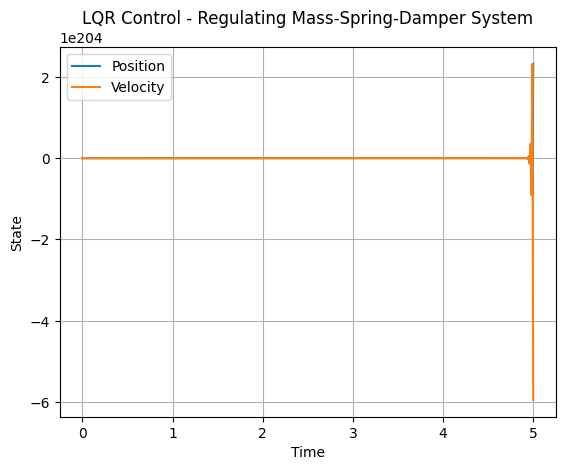

In [122]:
import numpy as np
import control
import matplotlib.pyplot as plt

# System parameters
m = 1.0  # Mass
k = 1.0  # Spring constant
b = 0.5  # Damping coefficient

# Define the system matrices
A = np.array([[0, 1], [-k/m, -b/m]])
B = np.array([[0], [1/m]])
C = np.array([[1, 0]])
D = np.array([[0]])

# Create the state-space system
sys = control.ss(A, B, C, D)

# Define the weighting matrices for the cost function
Q = np.diag([10, 10])  # State weighting matrix
R = np.array([[1]])  # Control input weighting matrix



# Simulation parameters
dt = 0.01  # Time step
T = 5.0  # Total simulation time
num_steps = int(T / dt)  # Number of simulation steps

# Compute the LQR controller gains
K, S, E = control.lqr(sys, Q, R)

print(E)
print(K)

# Initialize arrays to store time, states, and control inputs
t = np.linspace(0, T, num_steps)
x = np.zeros((num_steps, 2))
u = np.zeros((num_steps, 1))

# Set the desired state trajectory
x_desired = np.array([1, 0])  # Desired state [position, velocity]

# Simulate the system with LQR control
x[0] = np.array([1, 1])  # Initial state

for i in range(num_steps - 1):
    # Compute the control input based on the LQR controller and desired state
    u[i] = -K @ x[i] 

    # Update the state using the system dynamics
    x[i+1] = A @ x[i] + B @ u[i]

# Plot the results
plt.figure()
plt.plot(t, x[:, 0], label='Position')
plt.plot(t, x[:, 1], label='Velocity')
plt.xlabel('Time')
plt.ylabel('State')
plt.title('LQR Control - Regulating Mass-Spring-Damper System')
plt.legend()
plt.grid(True)
plt.show()

# Design LQR for tracking LTI

<LinearIOSystem>: sys[15418]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[ 0.   1.   0. ]
     [-2.  -0.5  0. ]
     [-1.   0.   1. ]]

B = [[0.]
     [1.]
     [0.]]

C = [[1. 0. 0.]]

D = [[0.]]

[7.70242033]
[-9.08929383]
[9.21415187]
[51.94930303]
[-162.63641477]
[178.86011328]
[436.63114784]
[-2120.95022577]
[3324.44594278]
[2711.1156106]
[-25411.57836462]
[53311.5198413]
[-3942.30417372]
[-280826.99388946]
[774209.28954603]
[-539798.65052361]
[-2785382.74054508]
[10415740.66047385]
[-12688866.61722275]
[-22929197.61464939]
[1.30813396e+08]
[-2.25248237e+08]
[-1.11394007e+08]
[1.52982853e+09]
[-3.4911085e+09]
[9.93787488e+08]
[1.64202222e+10]
[-4.94395214e+10]
[4.27420077e+10]
[1.55702834e+11]
[-6.50935319e+11]
[8.93417109e+11]
[1.16383317e+12]
[-8.00287177e+12]
[1.50862291e+13]
[3.31456538e+12]
[-9.13498674e+13]
[2.26704255e+14]
[-1.08229729e+14]
[-9.49183511e+14]
[3.1354876e+15]
[-3.21471349e+15]
[-8.52406511e+15]
[4.04177357e+16]
[-6.17

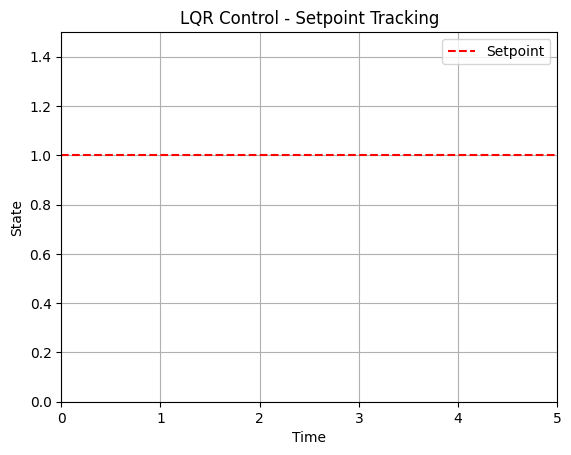

In [92]:
import numpy as np
import control
import matplotlib.pyplot as plt

m = 1.0
b = 0.5
k = 2.0

# Define the system matrices  (x1: position, x2: velocity)


A = np.array([[0, 1], [-k/m, -b/m]])
B = np.array([[0], [1/m]])
C = np.array([[1, 0]])
D = np.array([[0]])

# Set the desired setpoint
setpoint = 1.0

# Define the augmented system matrices
A_aug = np.vstack((np.hstack((A, np.zeros((2,1)))), np.array([[-1, 0, 1]])))
B_aug = np.vstack((B, np.array([[0]])))
C_aug = np.hstack((C, np.zeros((1, 1))))
D_aug = D

# Create the augmented state-space model
sys_aug = control.ss(A_aug, B_aug, C_aug, D_aug)
print(sys_aug)

# Define the weighting matrices for the cost function
Q_aug = np.diag([0, 0, 1])  # Augmented state weighting matrix
R_aug = np.array([[1]])  # Control input weighting matrix

# Compute the LQR controller gains for setpoint tracking
K_aug, _, _ = control.lqr(sys_aug, Q_aug, R_aug)

# Define the simulation parameters
dt = 0.01  # Time step
T = 5.0  # Total simulation time
num_steps = int(T / dt)  # Number of simulation steps

# Initialize arrays to store time, states, and control inputs
t = np.linspace(0, T, num_steps)
x = np.zeros((num_steps, 2))
u = np.zeros((num_steps, 1))

# Simulate the system with LQR control and setpoint tracking
x[0] = np.array([0, 0])  # Initial state

for i in range(num_steps - 1):
    # Compute the augmented state and error
    x_aug = np.hstack((x[i], setpoint))
    error = setpoint - x[i, 0]  # Compute the error from the setpoint

    # Compute the control input based on the LQR controller and setpoint tracking
    u_aug = -K_aug @ x_aug
    print(u_aug)
    u[i] = u_aug[0]  # Extract the control input from the augmented control vector

    # Update the state using the system dynamics
    x[i+1] = A @ x[i] + B @ u[i]

# Plot the results
plt.figure()
# plt.plot(t, x[:, 0], label='Position')
# plt.plot(t, x[:, 1], label='Velocity')
print(setpoint)
plt.axhline(setpoint, color='r', linestyle='--', label='Setpoint')
plt.xlim([0, T])
plt.ylim([0, 1.5])
plt.xlabel('Time')
plt.ylabel('State')
plt.title('LQR Control - Setpoint Tracking')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# https://automaticaddison.com/linear-quadratic-regulator-lqr-with-python-code-example/

import numpy as np
 
# Author: Addison Sears-Collins
# https://automaticaddison.com
# Description: Linear Quadratic Regulator example 
#   (two-wheeled differential drive robot car)
 
######################## DEFINE CONSTANTS #####################################
# Supress scientific notation when printing NumPy arrays
np.set_printoptions(precision=3,suppress=True)
 
# Optional Variables
max_linear_velocity = 3.0 # meters per second
max_angular_velocity = 1.5708 # radians per second
 
def getB(yaw, deltat):
    """
    Calculates and returns the B matrix
    3x2 matix ---> number of states x number of control inputs
 
    Expresses how the state of the system [x,y,yaw] changes
    from t-1 to t due to the control commands (i.e. control inputs).
     
    :param yaw: The yaw angle (rotation angle around the z axis) in radians 
    :param deltat: The change in time from timestep t-1 to t in seconds
     
    :return: B matrix ---> 3x2 NumPy array
    """
    B = np.array([  [np.cos(yaw)*deltat, 0],
                                    [np.sin(yaw)*deltat, 0],
                                    [0, deltat]])
    return B
 
 
def state_space_model(A, state_t_minus_1, B, control_input_t_minus_1):
    """
    Calculates the state at time t given the state at time t-1 and
    the control inputs applied at time t-1
     
    :param: A   The A state transition matrix
        3x3 NumPy Array
    :param: state_t_minus_1     The state at time t-1  
        3x1 NumPy Array given the state is [x,y,yaw angle] ---> 
        [meters, meters, radians]
    :param: B   The B state transition matrix
        3x2 NumPy Array
    :param: control_input_t_minus_1     Optimal control inputs at time t-1  
        2x1 NumPy Array given the control input vector is 
        [linear velocity of the car, angular velocity of the car]
        [meters per second, radians per second]
         
    :return: State estimate at time t
        3x1 NumPy Array given the state is [x,y,yaw angle] --->
        [meters, meters, radians]
    """
    # These next 6 lines of code which place limits on the angular and linear 
    # velocities of the robot car can be removed if you desire.
    control_input_t_minus_1[0] = np.clip(control_input_t_minus_1[0],
                                                                            -max_linear_velocity,
                                                                            max_linear_velocity)
    control_input_t_minus_1[1] = np.clip(control_input_t_minus_1[1],
                                                                            -max_angular_velocity,
                                                                            max_angular_velocity)
    state_estimate_t = (A @ state_t_minus_1) + (B @ control_input_t_minus_1) 
             
    return state_estimate_t
     
def lqr(actual_state_x, desired_state_xf, Q, R, A, B, dt):
    """
    Discrete-time linear quadratic regulator for a nonlinear system.
 
    Compute the optimal control inputs given a nonlinear system, cost matrices, 
    current state, and a final state.
     
    Compute the control variables that minimize the cumulative cost.
 
    Solve for P using the dynamic programming method.
 
    :param actual_state_x: The current state of the system 
        3x1 NumPy Array given the state is [x,y,yaw angle] --->
        [meters, meters, radians]
    :param desired_state_xf: The desired state of the system
        3x1 NumPy Array given the state is [x,y,yaw angle] --->
        [meters, meters, radians]   
    :param Q: The state cost matrix
        3x3 NumPy Array
    :param R: The input cost matrix
        2x2 NumPy Array
    :param dt: The size of the timestep in seconds -> float
 
    :return: u_star: Optimal action u for the current state 
        2x1 NumPy Array given the control input vector is
        [linear velocity of the car, angular velocity of the car]
        [meters per second, radians per second]
    """
    # We want the system to stabilize at desired_state_xf.
    x_error = actual_state_x - desired_state_xf
 
    # Solutions to discrete LQR problems are obtained using the dynamic 
    # programming method.
    # The optimal solution is obtained recursively, starting at the last 
    # timestep and working backwards.
    # You can play with this number
    N = 50
 
    # Create a list of N + 1 elements
    P = [None] * (N + 1)
     
    Qf = Q
 
    # LQR via Dynamic Programming
    P[N] = Qf
 
    # For i = N, ..., 1
    for i in range(N, 0, -1):
 
        # Discrete-time Algebraic Riccati equation to calculate the optimal 
        # state cost matrix
        P[i-1] = Q + A.T @ P[i] @ A - (A.T @ P[i] @ B) @ np.linalg.pinv(
            R + B.T @ P[i] @ B) @ (B.T @ P[i] @ A)      
 
    # Create a list of N elements
    K = [None] * N
    u = [None] * N
 
    # For i = 0, ..., N - 1
    for i in range(N):
 
        # Calculate the optimal feedback gain K
        K[i] = -np.linalg.pinv(R + B.T @ P[i+1] @ B) @ B.T @ P[i+1] @ A
 
        u[i] = K[i] @ x_error
 
    # Optimal control input is u_star
    u_star = u[N-1]
 
    return u_star
 
def main():
     
    # Let the time interval be 1.0 seconds
    dt = 1.0
     
    # Actual state
    # Our robot starts out at the origin (x=0 meters, y=0 meters), and 
    # the yaw angle is 0 radians. 
    actual_state_x = np.array([0,0,0]) 
 
    # Desired state [x,y,yaw angle]
    # [meters, meters, radians]
    desired_state_xf = np.array([2.000,2.000,np.pi/2])  
     
    # A matrix
    # 3x3 matrix -> number of states x number of states matrix
    # Expresses how the state of the system [x,y,yaw] changes 
    # from t-1 to t when no control command is executed.
    # Typically a robot on wheels only drives when the wheels are told to turn.
    # For this case, A is the identity matrix.
    # Note: A is sometimes F in the literature.
    A = np.array([  [1.0,  0,   0],
                                    [  0,1.0,   0],
                                    [  0,  0, 1.0]])
 
    # R matrix
    # The control input cost matrix
    # Experiment with different R matrices
    # This matrix penalizes actuator effort (i.e. rotation of the 
    # motors on the wheels that drive the linear velocity and angular velocity).
    # The R matrix has the same number of rows as the number of control
    # inputs and same number of columns as the number of 
    # control inputs.
    # This matrix has positive values along the diagonal and 0s elsewhere.
    # We can target control inputs where we want low actuator effort 
    # by making the corresponding value of R large. 
    R = np.array([[0.01,   0],  # Penalty for linear velocity effort
                [  0, 0.01]]) # Penalty for angular velocity effort
 
    # Q matrix
    # The state cost matrix.
    # Experiment with different Q matrices.
    # Q helps us weigh the relative importance of each state in the 
    # state vector (X, Y, YAW ANGLE). 
    # Q is a square matrix that has the same number of rows as 
    # there are states.
    # Q penalizes bad performance.
    # Q has positive values along the diagonal and zeros elsewhere.
    # Q enables us to target states where we want low error by making the 
    # corresponding value of Q large.
    Q = np.array([[0.639, 0, 0],  # Penalize X position error 
                                [0, 1.0, 0],  # Penalize Y position error 
                                [0, 0, 1.0]]) # Penalize YAW ANGLE heading error 
                   
    # Launch the robot, and have it move to the desired goal destination
    for i in range(100):
        print(f'iteration = {i} seconds')
        print(f'Current State = {actual_state_x}')
        print(f'Desired State = {desired_state_xf}')
         
        state_error = actual_state_x - desired_state_xf
        state_error_magnitude = np.linalg.norm(state_error)     
        print(f'State Error Magnitude = {state_error_magnitude}')
         
        B = getB(actual_state_x[2], dt)
         
        # LQR returns the optimal control input
        optimal_control_input = lqr(actual_state_x, 
                                    desired_state_xf, 
                                    Q, R, A, B, dt) 
         
        print(f'Control Input = {optimal_control_input}')
                                     
         
        # We apply the optimal control to the robot
        # so we can get a new actual (estimated) state.
        actual_state_x = state_space_model(A, actual_state_x, B, 
                                        optimal_control_input)  
 
        # Stop as soon as we reach the goal
        # Feel free to change this threshold value.
        if state_error_magnitude < 0.01:
            print("\nGoal Has Been Reached Successfully!")
            break
             
        print()
 
# Entry point for the program
main()

# Planing with Cross-entropy method (CEM)

Assume $p(u|t)$ is a gaussian distribution. For each time step, sample trajectories $\tau_N$ and choose top M high performance trajectories. Update  $p(u|t)$ with M selected trajectories. 

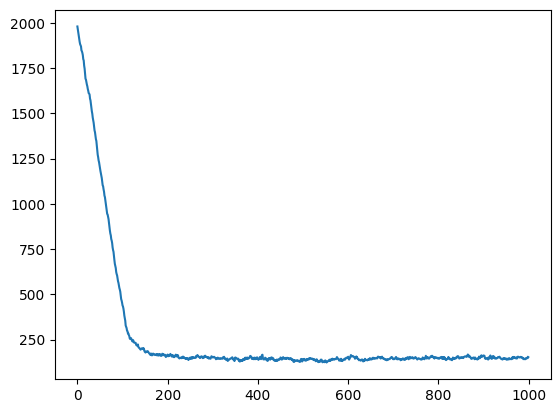

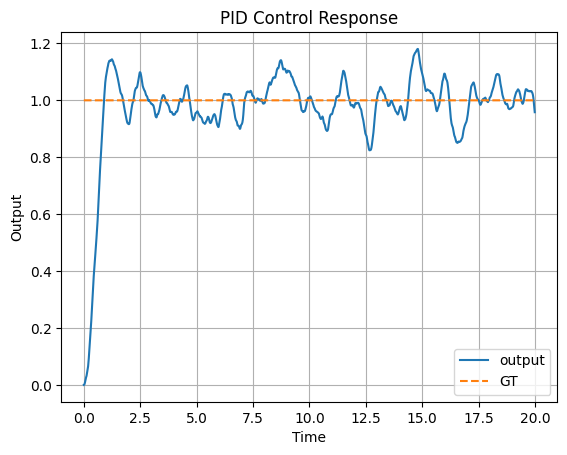

In [142]:
import control
import matplotlib.pyplot as plt
import numpy as np

# System parameters
m = 1.0
b = 0.5
k = 2.0

# Transfer function of the plant
num = [1]
den = [m, b, k]
plant = control.TransferFunction(num, den)

# PID controller gains
Kp = 20
Ki = 4
Kd = 3

dt = 0.01 
simulate_time = 20
num_steps = int(simulate_time / dt)  # Number of simulation steps

mus = np.zeros((num_steps,))
vars = np.zeros((num_steps,))+0.3


# Time vector
t = np.linspace(0, simulate_time-dt, num_steps) # +1 for initial state
ref = np.ones_like(t)

def train(epoches,num_rollout=10,num_selected=2):
    global mus,vars,t,ref
    costs = []
    for i in range(epoches):
        # sample num_rollout times with current mu and var

        Us = np.random.default_rng().multivariate_normal(mus, np.diag(vars), num_rollout, method='cholesky')

        simulate_costs = np.array([])
        # Simulate the response of the closed-loop system
        for i in range(num_rollout):
            t, y = control.forced_response(plant, T=t, U=Us[i])
            simulate_costs = np.append(simulate_costs, np.sum(np.abs(y-ref)))

        # select the best num_selected
        selected_index = np.argsort(simulate_costs)[:num_selected]
        # calculate the cost
        cost = np.sum(simulate_costs[selected_index])/num_selected
        
        # store the cost and parameters
        costs.append(cost)
        # update the mus and vars
        mus = np.mean(Us[selected_index],axis=0)
        # vars = np.var(Us[selected_index],axis=0)
    return costs



costs = train(1000)
plt.figure()
plt.plot(costs)


    


# Simulate the control system
t, y = control.forced_response(plant, T=t, U=mus)
plt.figure()
# Plot the response
plt.plot(t, y,label='output')
plt.plot(t, ref, '--', label='GT')
plt.title('PID Control Response')
plt.xlabel('Time')
plt.ylabel('Output')
plt.grid(True)
plt.legend()
plt.show()

# System identification


## Heat transfer system with delay simulation

![image](HeatExchanger.PNG)


Heat Transfer function

$G(s) = K / (sT + 1)$

- G(s) is the transfer function of the heat exchanger.
- K is the gain of the heat exchanger, representing the proportionality between the input and output temperatures.
- T is the time constant of the heat exchanger, representing the time it takes for the exchanger to reach a new steady-state temperature.

Pure time delay transfer function 

$G(s) = e^(-sθ)$

-G(s) is the transfer function of the time delay.
-$\theta$ represents the time delay.



References:
https://www.mathworks.com/help/ident/gs/about-system-identification.html 

Polinomial model
https://www.mathworks.com/help/ident/ug/what-are-polynomial-models.html#bq4sa85  

https://electronics.stackexchange.com/questions/273785/least-square-fit-transfer-function


In [2]:
import numpy as np
import control

# Example discrete input and output sequences
input_data = np.array([1, 2, 3, 4, 5])  # Replace with your actual input data
output_data = np.array([0, 1, 4, 9, 16])  # Replace with your actual output data

# Create a transfer function model
model = control.TransferFunction(input_data, output_data, dt=1.0)

print(model)

# # Convert the model to discrete-time using the Z-transform
# discrete_model = control.dlti(*model.num_den, dt=model.dt)

# # Display the discrete-time transfer function
# print("Discrete-time Transfer Function:")
# print(discrete_model)


z^4 + 2 z^3 + 3 z^2 + 4 z + 5
-----------------------------
   z^3 + 4 z^2 + 9 z + 16

dt = 1.0



# Fourier Series vs Fourier Transform and variants

http://chenweixiang.github.io/2016/06/14/fourier-transform.html
https://www.slideshare.net/SWATIMISHRA24/z-transfrm-ppt
